<a href="https://colab.research.google.com/github/ttlenh04/AI-hackathon---Face-analysis-challenge/blob/main/Emotion_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Unzip tệp test
!unzip '/content/drive/MyDrive/public_test.zip'

Archive:  /content/drive/MyDrive/public_test.zip
   creating: public_test/
  inflating: public_test/100147591.jpg  
  inflating: public_test/100429351.jpg  
  inflating: public_test/100473997.jpg  
  inflating: public_test/100868012.jpg  
  inflating: public_test/101013830.jpg  
  inflating: public_test/101061106.jpg  
  inflating: public_test/101347438.jpg  
  inflating: public_test/101564605.jpg  
  inflating: public_test/101954623.jpg  
  inflating: public_test/102320148.jpg  
  inflating: public_test/102495577.jpg  
  inflating: public_test/102800204.jpg  
  inflating: public_test/102808405.jpg  
  inflating: public_test/102830238.jpg  
  inflating: public_test/102845105.jpg  
  inflating: public_test/102971485.jpg  
  inflating: public_test/103111120.jpg  
  inflating: public_test/10321732.jpg  
  inflating: public_test/103239424.jpg  
  inflating: public_test/103468042.jpg  
  inflating: public_test/103947689.jpg  
  inflating: public_test/10398160.jpg  
  inflating: public_test/

Thay thế đường link bằng link google drive đã được nén thành file zip của tập data (lưu ý đoạn mã chỉ chạy một tập train)

Vào quá trình thực hiện

Thay thế đường link file json file_name_to_imgae

In [ ]:
from IPython.display import display, Image
import os
import json

# Đường dẫn tới thư mục chứa hình ảnh
image_folder_path = '/content/public_test'

# Đường dẫn tới file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo một từ điển để theo dõi số lần xuất hiện của mỗi image_id
image_id_counts = {}

# Tạo danh sách để lưu trữ các image_id bị trùng
duplicate_image_ids = []

# Lặp qua các file trong thư mục
for image_name, image_id in json_data.items():
    # Kiểm tra xem image_id đã xuất hiện trong từ điển chưa
    if image_id in image_id_counts:
        image_id_counts[image_id] += 1
        # Nếu image_id đã xuất hiện trước đó, thêm vào danh sách image_id bị trùng
        if image_id not in duplicate_image_ids:
            duplicate_image_ids.append(image_id)
    else:
        image_id_counts[image_id] = 1

# In ra các image_id bị trùng
print("Các image_id bị trùng:")
for duplicate_id in duplicate_image_ids:
    print(duplicate_id)


Các image_id bị trùng:


Vào đoạn mã train model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
!pip install -U torchvision # We need a new versino of torchvision for this project

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math
from PIL import Image
import cv2
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# remove arnings (optional)
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict, deque
import datetime
import time
from tqdm import tqdm # progress bar
from torchvision.utils import draw_bounding_boxes

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.1.2+cu121
0.16.2+cu121


In [ ]:
# our dataset is in cocoformat, we will need pypcoco tools
!pip install pycocotools
from pycocotools.coco import COCO

In [ ]:
# Now, we will define our transforms
from albumentations.pytorch import ToTensorV2

Tới đoạn code thực thi chỉnh sửa tệp đầu vào

In [ ]:
def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform

In [ ]:
class AquariumDetection(datasets.VisionDataset):
    def __init__(self, root, split='train', transform=None, target_transform=None, transforms=None):
        # the 3 transform parameters are reuqired for datasets.VisionDataset
        super().__init__(root, transforms, transform, target_transform)
        self.split = split #train, valid, test
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json")) # annotatiosn stored here
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.ids = [id for id in self.ids if (len(self._load_target(id)) > 0)]

    def _load_image(self, id: int):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index):
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)
        target = copy.deepcopy(self._load_target(id))

        boxes = [t['bbox'] + [t['category_id']] for t in target] # required annotation format for albumentations
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)

        image = transformed['image']
        boxes = transformed['bboxes']

        new_boxes = [] # convert from xywh to xyxy
        for box in boxes:
            xmin = box[0]
            xmax = xmin + box[2]
            ymin = box[1]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.tensor(new_boxes, dtype=torch.float32)

        targ = {} # here is our transformed target
        targ['boxes'] = boxes
        targ['labels'] = torch.tensor([t['category_id'] for t in target], dtype=torch.int64)
        targ['image_id'] = torch.tensor([t['image_id'] for t in target])
        targ['area'] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # we have a different area
        targ['iscrowd'] = torch.tensor([t['iscrowd'] for t in target], dtype=torch.int64)
        return image.div(255), targ # scale images
    def __len__(self):
        return len(self.ids)

In [ ]:
!unzip '/content/drive/MyDrive/emotion.zip'

Archive:  /content/drive/MyDrive/emotion.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/100620073_jpg.rf.b73f43507a3aa9ea42fccdc0a845823e.jpg  
 extracting: train/101346736_jpg.rf.b95520bc16d2900b737d549247b59593.jpg  
 extracting: train/101346736_jpg.rf.eea02fcee21f8a717739d8286321e599.jpg  
 extracting: train/101346736_jpg.rf.ff4256593cb4f328aaac563ffc9b66c3.jpg  
 extracting: train/10184002_jpg.rf.55eaccce0cef1cdc447031005a04aeda.jpg  
 extracting: train/102037099_jpg.rf.1e7539dbd4f09e38321de0f92421d55c.jpg  
 extracting: train/102037099_jpg.rf.71162346f84534c2dcbb90fda836f8ce.jpg  
 extracting: train/102037099_jpg.rf.ba33a87401672b2726d742240a3c39c3.jpg  
 extracting: train/102037099_jpg.rf.be44d989d12a790f75d3e687c34761dc.jpg  
 extracting: train/10259947_jpg.rf.33180f969b31341b21c2cf1d50c5ecbc.jpg  
 extracting: train/10259947_jpg.rf.dc11a0cba521819f8ff2bd6053c3a8ac.jpg  
 extracting: train/102630150_jpg.rf.2

In [ ]:
dataset_path = '/content'

In [ ]:
#load classes
coco = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
categories = coco.cats
n_classes = len(categories.keys())
categories

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


{0: {'id': 0, 'name': 'face111', 'supercategory': 'none'},
 1: {'id': 1, 'name': 'Anger', 'supercategory': 'face111'},
 2: {'id': 2, 'name': 'Disgust', 'supercategory': 'face111'},
 3: {'id': 3, 'name': 'Fear', 'supercategory': 'face111'},
 4: {'id': 4, 'name': 'Happiness', 'supercategory': 'face111'},
 5: {'id': 5, 'name': 'Neutral', 'supercategory': 'face111'},
 6: {'id': 6, 'name': 'Sadness', 'supercategory': 'face111'},
 7: {'id': 7, 'name': 'Surprise', 'supercategory': 'face111'}}

In [ ]:
classes = [i[1]['name'] for i in categories.items()]
classes

['face111',
 'Anger',
 'Disgust',
 'Fear',
 'Happiness',
 'Neutral',
 'Sadness',
 'Surprise']

In [ ]:
train_dataset = AquariumDetection(root=dataset_path, transforms=get_transforms(True))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


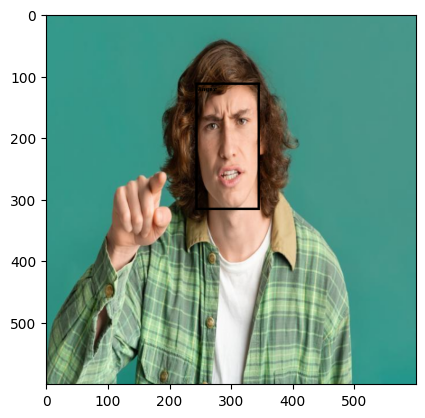

In [ ]:
# Lets view a sample
sample = train_dataset[2]
img_int = torch.tensor(sample[0] * 255, dtype=torch.uint8)
plt.imshow(draw_bounding_boxes(
    img_int, sample[1]['boxes'], [classes[i] for i in sample[1]['labels']], width=4
).permute(1, 2, 0))

In [ ]:
len(train_dataset)

3365

In [ ]:
# lets load the faster rcnn model
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, n_classes)

Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:00<00:00, 122MB/s]


In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)

In [ ]:
images,targets = next(iter(train_loader))
images = list(image for image in images)
targets = [{k:v for k, v in t.items()} for t in targets]
output = model(images, targets) # just make sure this runs without error

In [ ]:
device = torch.device("cuda") # use GPU to train

In [ ]:
model = model.to(device)

In [ ]:
# Now, and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[16, 22], gamma=0.1) # lr scheduler

In [ ]:
import sys

In [ ]:
def train_one_epoch(model, optimizer, loader, device, epoch):
    model.to(device)
    model.train()

#     lr_scheduler = None
#     if epoch == 0:
#         warmup_factor = 1.0 / 1000 # do lr warmup
#         warmup_iters = min(1000, len(loader) - 1)

#         lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor = warmup_factor, total_iters=warmup_iters)

    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(loader):
        images = list(image.to(device) for image in images)
        targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # the model computes the loss automatically if we pass in targets
        losses = sum(loss for loss in loss_dict.values())
        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        loss_value = losses.item()

        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping trainig") # train if loss becomes infinity
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

#         if lr_scheduler is not None:
#             lr_scheduler.step() #

    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, lr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}, loss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))

In [ ]:
num_epochs=50

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
#     lr_scheduler.step()

100%|██████████| 842/842 [01:55<00:00,  7.28it/s]


Epoch 0, lr: 0.010000, loss: 1.113440, loss_classifier: 0.730715, loss_box: 0.372904, loss_rpn_box: 0.002665, loss_object: 0.007156


100%|██████████| 842/842 [01:54<00:00,  7.35it/s]


Epoch 1, lr: 0.010000, loss: 1.090934, loss_classifier: 0.754332, loss_box: 0.331125, loss_rpn_box: 0.001905, loss_object: 0.003572


100%|██████████| 842/842 [01:55<00:00,  7.30it/s]


Epoch 2, lr: 0.010000, loss: 0.994483, loss_classifier: 0.675269, loss_box: 0.314137, loss_rpn_box: 0.001697, loss_object: 0.003380


100%|██████████| 842/842 [01:52<00:00,  7.49it/s]


Epoch 3, lr: 0.010000, loss: 0.931612, loss_classifier: 0.620388, loss_box: 0.306540, loss_rpn_box: 0.001621, loss_object: 0.003063


 58%|█████▊    | 489/842 [01:05<00:41,  8.45it/s]

In [ ]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Tính toán tọa độ của hộp giao nhau
    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    # Tính toán diện tích phần giao và phần hợp
    area_intersection = max(0, w_intersection) * max(0, h_intersection)
    area_union = w1 * h1 + w2 * h2 - area_intersection

    # Tính toán IoU
    iou = area_intersection / max(area_union, 1e-10)
    return iou

In [ ]:
model.eval()


In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import os
import json
import pandas as pd

# Chọn thiết bị (CPU hoặc GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ngưỡng độ tin cậy để coi một dự đoán là đúng
confidence_threshold = 0.5

# Tên các lớp trong COCO dataset
coco_classes = [
    "Happiness", "Anger", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"
]

# Đường dẫn đến thư mục chứa hình ảnh test
test_folder_path = '/content/public_test'

# Đường dẫn đến file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo danh sách để lưu thông tin
file_names = []
image_ids = []
emotions = []
all_boxes = []  # Danh sách chứa thông tin của tất cả các bounding box

# Tạo DataFrame để tổ chức dữ liệu
data = {'File Name': [], 'Image ID': [], 'Emotion': [], 'Box': []}

# Duyệt qua từng hình ảnh và thực hiện dự đoán
for image_name, image_id in json_data.items():
    # Đường dẫn đầy đủ đến hình ảnh
    image_path = os.path.join(test_folder_path, image_name)

    # Đọc hình ảnh từ đường dẫn
    img = Image.open(image_path).convert("RGB")

    # Áp dụng các biến đổi cho hình ảnh nếu cần
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(img).to(device)

    # Dự đoán nhãn sử dụng mô hình (chưa có mô hình được định nghĩa trong mã của bạn)
    # Đặt tên mô hình của bạn ở đây, ví dụ: model = your_custom_model()
    with torch.no_grad():
        prediction = model(img_tensor.unsqueeze(0))

    # Kiểm tra nếu có dự đoán hoặc không
    if prediction[0]['scores'].cpu().numpy().size > 0:
        # Lấy dự đoán có độ tin cậy cao nhất
        top_prediction = max(prediction[0]['scores'].cpu().numpy())
        top_index = np.argmax(prediction[0]['scores'].cpu().numpy())
        top_class = coco_classes[prediction[0]['labels'].cpu().numpy()[top_index]]

        # Lấy thông tin vị trí bounding box
        top_box = prediction[0]['boxes'].cpu().numpy()[top_index]
    else:
        # Nếu không có dự đoán, sử dụng giá trị mặc định là "Happiness"
        top_prediction = 0.0
        top_index = -1
        top_class = "Happiness"
        top_box = [0.0, 0.0, 0.0, 0.0]

    # Lưu thông tin vào danh sách và DataFrame
    file_names.append(image_name)
    image_ids.append(image_id)
    emotions.append(top_class)
    all_boxes.append(top_box)

    # Thêm dữ liệu vào DataFrame
    data['File Name'].append(image_name)
    data['Image ID'].append(image_id)
    data['Emotion'].append(top_class)
    data['Box'].append(top_box)

# Đảm bảo rằng số lượng phần tử trong các list là bằng nhau
while len(file_names) < len(json_data):
    file_names.append(None)
    image_ids.append(None)
    emotions.append("Happiness")
    all_boxes.append([0.0, 0.0, 0.0, 0.0])

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Ghi DataFrame vào file Excel
excel_output_path = '/content/drive/MyDrive/emotion50epochver2.xlsx'
df.to_excel(excel_output_path, index=False)

print(f"Dữ liệu và dự đoán đã được lưu vào file Excel: {excel_output_path}")


In [ ]:
import torch
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Chọn thiết bị (CPU hoặc GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Ngưỡng độ tin cậy để coi một dự đoán là đúng
confidence_threshold = 0.5

# Tên các lớp trong COCO dataset
coco_classes = [
    "Happiness", "Anger", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"
]

# Đường dẫn đến thư mục chứa hình ảnh test
test_folder_path = '/content/public_test'

# Đường dẫn đến file JSON
json_file_path = '/content/drive/MyDrive/file_name_to_image_id.json'

# Đọc nội dung từ file JSON
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

# Tạo danh sách để lưu thông tin
file_names = []
image_ids = []
emotion = []
all_boxes = []  # Danh sách chứa thông tin của tất cả các bounding box

# Tạo DataFrame để tổ chức dữ liệu
data = {'File Name': [], 'Image ID': [], 'Emotion': [], 'Box': []}

# Duyệt qua từng hình ảnh và thực hiện dự đoán
for image_name, image_id in json_data.items():
    # Đường dẫn đầy đủ đến hình ảnh
    image_path = os.path.join(test_folder_path, image_name)

    # Đọc hình ảnh từ đường dẫn
    img = Image.open(image_path).convert("RGB")

    # Áp dụng các biến đổi cho hình ảnh nếu cần
    transform = transforms.Compose([transforms.ToTensor()])
    img_tensor = transform(img).to(device)

    # Dự đoán nhãn sử dụng mô hình (đặt tên mô hình của bạn ở đây)

    with torch.no_grad():
        prediction = model(img_tensor.unsqueeze(0))

    # Kiểm tra nếu có dự đoán hoặc không
    if prediction[0]['scores'].cpu().numpy().size > 0:
        # Lấy dự đoán có độ tin cậy cao nhất
        top_prediction = max(prediction[0]['scores'].cpu().numpy())
        top_index = np.argmax(prediction[0]['scores'].cpu().numpy())
        top_class = coco_classes[prediction[0]['labels'].cpu().numpy()[top_index]]

        # Lấy thông tin vị trí bounding box
        top_box = prediction[0]['boxes'].cpu().numpy()[top_index]

        # Hiển thị hình ảnh và bounding box với nhãn lớp
        plt.figure(figsize=(8, 8))
        ax = plt.gca()

        # Hiển thị hình ảnh
        ax.imshow(img)

        # Hiển thị bounding box và nhãn lớp
        rect = patches.Rectangle(
            (top_box[0], top_box[1]),
            top_box[2] - top_box[0],
            top_box[3] - top_box[1],
            linewidth=2,
            edgecolor='r',
            facecolor='none',
            label=top_class
        )
        ax.add_patch(rect)

        # Đặt tiêu đề là tên lớp dự đoán
        ax.set_title(top_class)

        plt.show()

    else:
        print(f"Không có dự đoán cho hình ảnh: {image_name}")

print("Hoàn thành dự đoán và hiển thị trên hình ảnh.")